# 01. Importing libraries

In [1]:
conda install seaborn matplotlib scipy

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [3]:
#Define path
path = r'C:\Users\Josh Abrams\Desktop\09-2022 Instacart Basket Analysis'

In [4]:
df_full = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'full_instacart_data.pkl'))


In [5]:
df_full = pd.read_pickle(r'C:\Users\Josh Abrams\Desktop\09-2022 Instacart Basket Analysis\Data\Prepared Data\full_instacart_data.pkl')


In [6]:
df_full

,Unnamed: 0_x,order_id,customer_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,median_days_since_previous_order,Frequency_flag,gender,state,age,date_joined,num_dpdnts,marital_status,income,_merge
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,2398795,1,prior,2,3,7,15.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,473747,1,prior,3,3,12,21.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,2254736,1,prior,4,4,7,29.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,431534,1,prior,5,4,15,28.0,196,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1768145,156685,106143,prior,26,4,23,5.0,19675,1,...,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both
32404855,1101646,484769,66343,prior,1,6,11,NaN,47210,1,...,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404856,1101647,1561557,66343,prior,2,1,11,30.0,47210,1,...,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404857,1101648,276317,66343,prior,3,6,15,19.0,47210,1,...,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both


## Question 2
Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

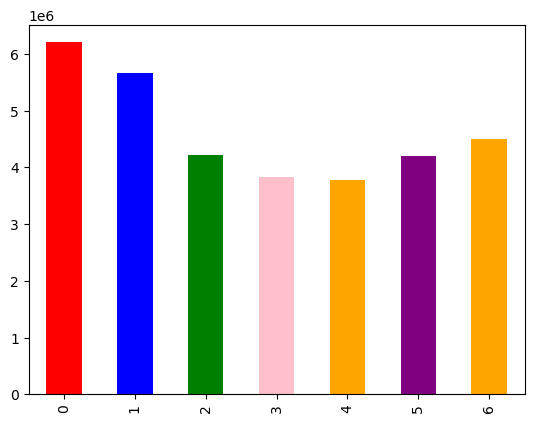

In [7]:
# bar chart
bar = df_full['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green', 'pink', 'orange', 'purple', 'orange'])

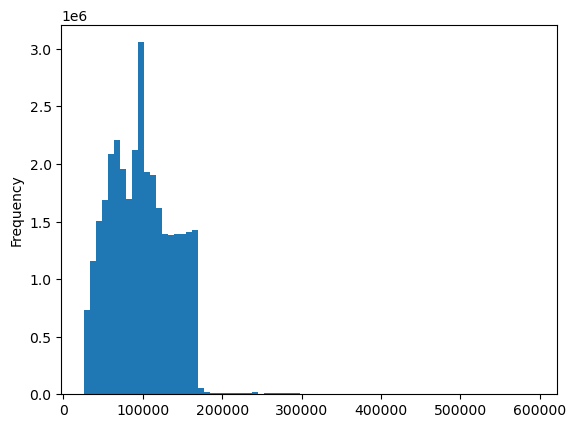

In [8]:
# histogram
hist = df_full['income'].plot.hist(bins=75)

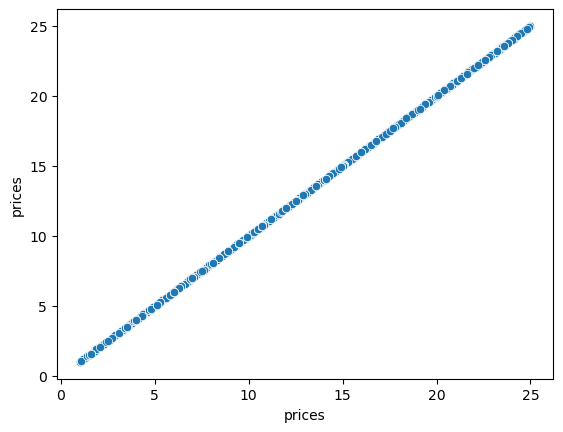

In [9]:
#scatterplot
splot = sns.scatterplot(x = 'prices', y = 'prices', data = df_full)

In [10]:
# define the sub set of the df for the line chart (plotting the top 1 million)
# creating a random sampling
np.random.seed(4)

In [11]:
dev = np.random.rand(len(df_full)) <= 0.7

In [12]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [13]:
#splitting the dataframe (70% of the sample in the dataframe)
big = df_full[dev]

In [14]:
#splitting the dataframe (30% of the sample in the dataframe)
small = df_full[~dev]

In [15]:
#checking the execution for accuraccy
len(df_full)

32404859

In [16]:
len(big) + len(small)

32404859

In [17]:
# select the columns needed line plot
df_full_data2 = small[['orders_day_of_week', 'prices']]

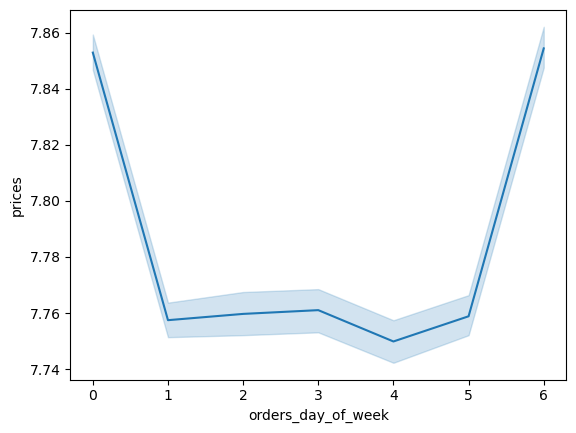

In [18]:
line = sns.lineplot(data = df_full_data2, x = 'orders_day_of_week',y = 'prices')

## Question 3 
You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

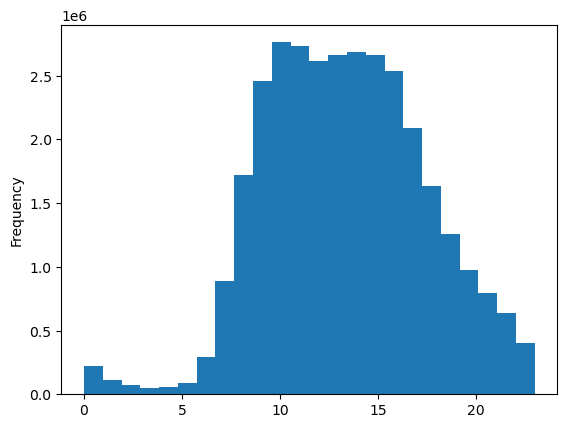

In [19]:
hist_hour = df_full['order_hour_of_day'].plot.hist(bins = 24)

## -In a markdown cell beneath your histogram, describe what the histogram demonstrates.
#### The above histogram represents the hours of the day (0 - 23 hour) and the total amount of orders placed for each hour (in millions)


In [20]:
#checking the histogram accuracy
df_full['order_hour_of_day'].value_counts(dropna=False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

## Question 4 

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

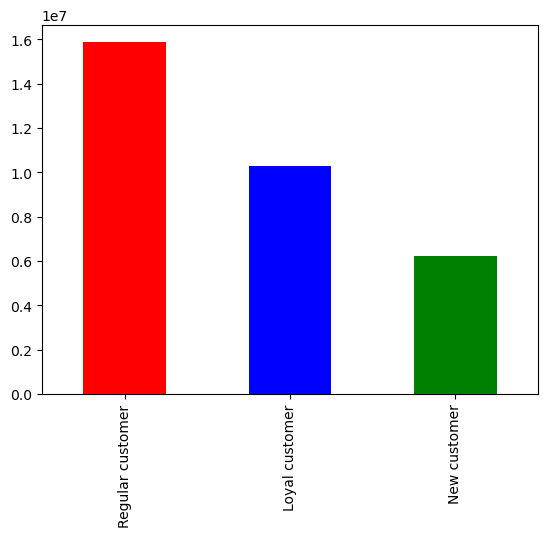

In [21]:
#plotting bar chart for the loyalty flag
loyalty_bar = df_full['loyalty_flag'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

In [22]:
#df_complete_data.info()

## Question 5 
Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [23]:
#using the earlier splitted data of 30% and selecting the right columns
df_prices_hour = small[['order_hour_of_day', 'prices']]

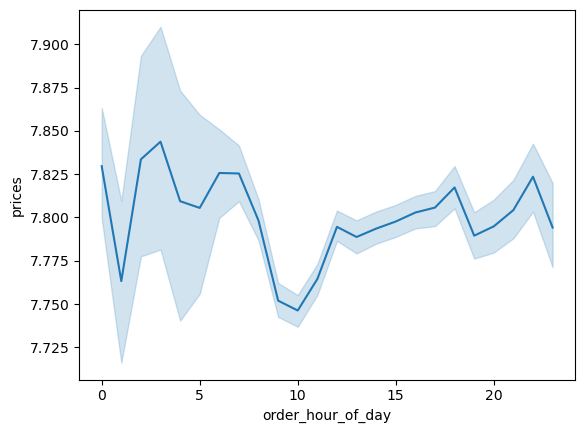

In [24]:
# Create line chart
line2 = sns.lineplot(data = df_prices_hour, x = 'order_hour_of_day', y = 'prices')

## Question 6
Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [25]:
#using the earlier splitted data of 30% and selecting the right columns
df_fam_status_age = small [['num_dpdnts', 'age']]

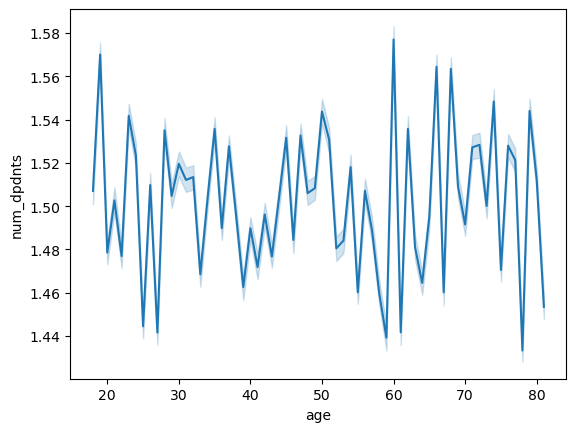

In [26]:
#create line chart
line3 = sns.lineplot(data = df_fam_status_age, x = 'age', y = 'num_dpdnts')

#### The line chart shows the relationship between customer's age and the number of dependents in each family. However, the line does show a distinct relationship between age of instacart customers and the number of dependents. 

## Question 7
You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [27]:
#using the earlier splitted data of 30% and selecting the right columns
df_income_age = small [['income', 'age']]

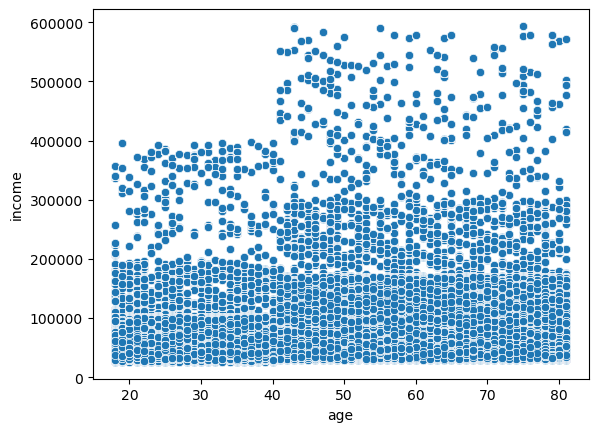

In [28]:
#create scatter plot
plot_spending = sns.scatterplot(x = 'age', y = 'income', data = df_income_age)

#### The scatterplot shows the relationship between between age and income of instacart customers. Some facts are explitcit from the plot :
##### 1. There are massive concetration of customers across all ages that earns up to 200,000 USD.
##### 2. Customers 40 years and olders are earning more  (up to 600,000 USD).
##### 3. Therefore, in can be concluded that instacart customers 40 years and above have ability to spend more base on their higher income earnings.

## 8. Export your visualizations as “.png” files in your relevant project folder.

In [29]:
bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_4_9.png'))

In [30]:
hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_4_9.png'))

In [31]:
splot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'splot_4_9.png'))

In [32]:
line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_4_9.png'))

In [33]:
hist_hour.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_hour_4_9.png'))

In [34]:
loyalty_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_bar_4_9.png'))

In [35]:
line2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_prices_hour_4_9.png'))

In [36]:
line3.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_age_deps_4_9.png'))

In [37]:
plot_spending.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatter_spending_power_4_9.png'))